# Data Preparation & Cleaning
This steps involves importing the relevant python libraries, importing the source data, and cleaning and shaping the data for it to be useful for our analyses

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime as dt
import seaborn as sns
import plotly.express as px

In [2]:
# Import data files
death_data_path = "data/DeathsByState.csv"
population_data_path = "data/PopulationByState.csv"

# Read the data and the study results
death_data = pd.read_csv(death_data_path)
population_data = pd.read_csv(population_data_path, index_col = False)

#Print data to understand basic shape and content
print(f'{death_data.head()}')
print(f'{population_data.head()}')

  Data As Of Jurisdiction of Occurrence  MMWR Year  MMWR Week  \
0   2/8/2023              United States       2020          1   
1   2/8/2023              United States       2020          2   
2   2/8/2023              United States       2020          3   
3   2/8/2023              United States       2020          4   
4   2/8/2023              United States       2020          5   

  Week Ending Date  All Cause  Natural Cause  Septicemia (A40-A41)  \
0         1/4/2020    60176.0        55009.0                 843.0   
1        1/11/2020    60744.0        55760.0                 861.0   
2        1/18/2020    59363.0        54516.0                 829.0   
3        1/25/2020    59162.0        54401.0                 828.0   
4         2/1/2020    58834.0        54001.0                 811.0   

   Malignant neoplasms (C00-C97)  Diabetes mellitus (E10-E14)  ...  flag_alz  \
0                        11569.0                       1829.0  ...       NaN   
1                        119

In [3]:
#Obtain list of columns for death_data
death_data.columns

Index(['Data As Of', 'Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'fl

In [4]:
#Obtain list of columns for population_data
population_data.columns

Index(['State', '2020', '2021', '2022'], dtype='object')

In [5]:
# Reduced number of columns
reduced_df = death_data.drop(['Data As Of','flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'flag_otherunk', 'flag_hd', 'flag_stroke', 'flag_cov19mcod',
       'flag_cov19ucod'], axis = 1)

In [6]:
# Filter 
filtered_df = reduced_df.loc[(reduced_df["Jurisdiction of Occurrence"]!="United States") &
(reduced_df["Jurisdiction of Occurrence"]!="New York City") &
(reduced_df["MMWR Year"]!=2023)                            ]
filtered_df

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
161,Alabama,2020,1,1/4/2020,1082.0,1009.0,15.0,196.0,25.0,54.0,28.0,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0
162,Alabama,2020,2,1/11/2020,1127.0,1060.0,25.0,197.0,17.0,41.0,27.0,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0
163,Alabama,2020,3,1/18/2020,1039.0,976.0,28.0,201.0,24.0,53.0,31.0,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0
164,Alabama,2020,4,1/25/2020,1056.0,982.0,16.0,190.0,23.0,54.0,29.0,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0
165,Alabama,2020,5,2/1/2020,1026.0,949.0,15.0,157.0,16.0,58.0,31.0,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,Puerto Rico,2022,48,12/3/2022,697.0,664.0,11.0,105.0,48.0,69.0,20.0,13.0,16.0,25.0,25.0,108.0,18.0,41.0,34.0
8686,Puerto Rico,2022,49,12/10/2022,728.0,689.0,14.0,112.0,64.0,69.0,18.0,20.0,14.0,25.0,31.0,119.0,30.0,39.0,35.0
8687,Puerto Rico,2022,50,12/17/2022,719.0,692.0,20.0,98.0,64.0,60.0,25.0,27.0,NaN,29.0,22.0,126.0,28.0,38.0,28.0
8688,Puerto Rico,2022,51,12/24/2022,695.0,667.0,24.0,92.0,62.0,54.0,19.0,25.0,NaN,21.0,28.0,121.0,27.0,36.0,32.0


In [7]:
filtered_df.dtypes

Jurisdiction of Occurrence                                                                            object
MMWR Year                                                                                              int64
MMWR Week                                                                                              int64
Week Ending Date                                                                                      object
All Cause                                                                                            float64
Natural Cause                                                                                        float64
Septicemia (A40-A41)                                                                                 float64
Malignant neoplasms (C00-C97)                                                                        float64
Diabetes mellitus (E10-E14)                                                                          float64
Alzheimer disease (

In [8]:
# Change date dtype from object to datetime 
filtered_df['Week Ending Date'] = pd.to_datetime(filtered_df['Week Ending Date'])
filtered_df['MMWR Year'] = pd.to_datetime(filtered_df['MMWR Year'])

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Add state code and add to df
state_to_code = {'District of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 
                 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 
                 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 
                 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 
                 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA',
                 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 
                 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 
                 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
                 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ',
                 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV',
                 'Maine': 'ME', 'Puerto Rico': 'PR'}
filtered_df['State Code'] = filtered_df['Jurisdiction of Occurrence'].apply(lambda x : state_to_code[x])
filtered_df.head()

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",State Code
161,Alabama,1970-01-01 00:00:00.000002020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,28.0,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,AL
162,Alabama,1970-01-01 00:00:00.000002020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,27.0,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,AL
163,Alabama,1970-01-01 00:00:00.000002020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,31.0,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,AL
164,Alabama,1970-01-01 00:00:00.000002020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,29.0,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0,AL
165,Alabama,1970-01-01 00:00:00.000002020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,31.0,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,AL


In [10]:
# Add month, year, and month-year columns
filtered_df['Month'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).month
filtered_df['MMWR Year'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).year
filtered_df['Month-Year'] = filtered_df['Week Ending Date'].dt.to_period('M')     

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [11]:
#Verify additions
filtered_df.dtypes

Jurisdiction of Occurrence                                                                                   object
MMWR Year                                                                                                     int64
MMWR Week                                                                                                     int64
Week Ending Date                                                                                     datetime64[ns]
All Cause                                                                                                   float64
Natural Cause                                                                                               float64
Septicemia (A40-A41)                                                                                        float64
Malignant neoplasms (C00-C97)                                                                               float64
Diabetes mellitus (E10-E14)                                             

In [12]:
# Extract month by month name
filtered_df['Month'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).month
filtered_df['MMWR Year'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).year

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Format 'Week Ending Date'
filtered_df['Month'] = filtered_df['Week Ending Date'].dt.strftime('%B')
filtered_df.head()

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",State Code,Month,Month-Year
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,13.0,25.0,25.0,268.0,81.0,0.0,0.0,AL,January,2020-01
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,20.0,23.0,34.0,274.0,68.0,0.0,0.0,AL,January,2020-01
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,21.0,23.0,24.0,239.0,45.0,0.0,0.0,AL,January,2020-01
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,11.0,14.0,23.0,284.0,70.0,NaN,0.0,AL,January,2020-01
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,17.0,20.0,23.0,265.0,55.0,0.0,0.0,AL,February,2020-02


In [14]:
# Create season list and add to df
seasons = {'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
           'June': 'Summer', 'July': 'Summer','August': 'Summer',
           'September': 'Fall', 'October':'Fall', 'November':'Fall',
           'December': 'Winter', 'January': 'Winter', 'February': 'Winter'
           }
filtered_df['Season'] = filtered_df['Month'].apply(lambda x: seasons[x])

C:\Users\Bethelhem\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
#verify added column
filtered_df

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,"Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",State Code,Month,Month-Year,Season
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,25.0,25.0,268.0,81.0,0.0,0.0,AL,January,2020-01,Winter
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,23.0,34.0,274.0,68.0,0.0,0.0,AL,January,2020-01,Winter
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,23.0,24.0,239.0,45.0,0.0,0.0,AL,January,2020-01,Winter
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,14.0,23.0,284.0,70.0,NaN,0.0,AL,January,2020-01,Winter
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,20.0,23.0,265.0,55.0,0.0,0.0,AL,February,2020-02,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,Puerto Rico,2022,48,2022-12-03,697.0,664.0,11.0,105.0,48.0,69.0,...,25.0,25.0,108.0,18.0,41.0,34.0,PR,December,2022-12,Winter
8686,Puerto Rico,2022,49,2022-12-10,728.0,689.0,14.0,112.0,64.0,69.0,...,25.0,31.0,119.0,30.0,39.0,35.0,PR,December,2022-12,Winter
8687,Puerto Rico,2022,50,2022-12-17,719.0,692.0,20.0,98.0,64.0,60.0,...,29.0,22.0,126.0,28.0,38.0,28.0,PR,December,2022-12,Winter
8688,Puerto Rico,2022,51,2022-12-24,695.0,667.0,24.0,92.0,62.0,54.0,...,21.0,28.0,121.0,27.0,36.0,32.0,PR,December,2022-12,Winter


In [16]:
# Rename columns for readability
renamed_df = filtered_df.rename(columns={'Jurisdiction of Occurrence':'State', 'MMWR Year': 'Year', 'MMWR Week':'Week', 'Week Ending Date': 'Date',
                                         'Septicemia (A40-A41)':'Septicemia (Blood Poisoning/ Infection)', 'Malignant neoplasms (C00-C97)':'Cancer',
                                         'Diabetes mellitus (E10-E14)': 'Diabetes', 'Alzheimer disease (G30)':'Alzheimer Diseases', 
                                         'Influenza and pneumonia (J09-J18)':'Influenza & Pneumonia', 'Chronic lower respiratory diseases (J40-J47)':'Chronic Lower Respiratory Diseases', 
                                         'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)':'Other Diseases of Respiratory System',
                                        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Unclassified',
                                         'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Kidney Disease', 'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Heart Diseases',
                                         'Cerebrovascular diseases (I60-I69)': 'Cerebrovascular Diseases', 'COVID-19 (U071, Multiple Cause of Death)':'COVID-19 (Multiple Cause of Death)',
                                         'COVID-19 (U071, Underlying Cause of Death)':'COVID-19 (Underlying Cause of Death)'
                                        })
renamed_df.head()

,State,Year,Week,Date,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,...,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),State Code,Month,Month-Year,Season
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,25.0,25.0,268.0,81.0,0.0,0.0,AL,January,2020-01,Winter
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,23.0,34.0,274.0,68.0,0.0,0.0,AL,January,2020-01,Winter
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,23.0,24.0,239.0,45.0,0.0,0.0,AL,January,2020-01,Winter
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,14.0,23.0,284.0,70.0,NaN,0.0,AL,January,2020-01,Winter
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,20.0,23.0,265.0,55.0,0.0,0.0,AL,February,2020-02,Winter


In [17]:
#review column renames
renamed_df.columns

Index(['State', 'Year', 'Week', 'Date', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'State Code', 'Month',
       'Month-Year', 'Season'],
      dtype='object')

In [18]:
# Sum covid cases in one column, Respiratory Diseases, Cerebrovascular diseases and heart diseases
renamed_df['Respiratory Diseases'] = renamed_df['Chronic Lower Respiratory Diseases'] + renamed_df['Other Diseases of Respiratory System']
renamed_df['All Heart Diseases'] = renamed_df['Heart Diseases'] + renamed_df['Cerebrovascular Diseases']
renamed_df['COVID-19'] = renamed_df['COVID-19 (Multiple Cause of Death)'] + renamed_df['COVID-19 (Underlying Cause of Death)']

renamed_df.head()

,State,Year,Week,Date,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,...,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),State Code,Month,Month-Year,Season,Respiratory Diseases,All Heart Diseases,COVID-19
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,81.0,0.0,0.0,AL,January,2020-01,Winter,99.0,349.0,0.0
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,68.0,0.0,0.0,AL,January,2020-01,Winter,92.0,342.0,0.0
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,45.0,0.0,0.0,AL,January,2020-01,Winter,94.0,284.0,0.0
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,70.0,NaN,0.0,AL,January,2020-01,Winter,72.0,354.0,NaN
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,55.0,0.0,0.0,AL,February,2020-02,Winter,93.0,320.0,0.0


In [19]:
#verify consolidation of columns
renamed_df.columns

Index(['State', 'Year', 'Week', 'Date', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'State Code', 'Month',
       'Month-Year', 'Season', 'Respiratory Diseases', 'All Heart Diseases',
       'COVID-19'],
      dtype='object')

In [20]:
# Reorder Columns
reordered_df = renamed_df[['State','State Code','Date','Week', 'Month','Year','Month-Year', 'Season', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Respiratory Diseases','Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases', 'All Heart Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'COVID-19']]

reordered_df = reordered_df.reset_index(drop = True)
reordered_df

,State,State Code,Date,Week,Month,Year,Month-Year,Season,All Cause,Natural Cause,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,AL,2020-01-04,1,January,2020,2020-01,Winter,1082.0,1009.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,AL,2020-01-11,2,January,2020,2020-01,Winter,1127.0,1060.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,AL,2020-01-18,3,January,2020,2020-01,Winter,1039.0,976.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,AL,2020-01-25,4,January,2020,2020-01,Winter,1056.0,982.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,NaN,0.0,NaN
4,Alabama,AL,2020-02-01,5,February,2020,2020-02,Winter,1026.0,949.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,Puerto Rico,PR,2022-12-03,48,December,2022,2022-12,Winter,697.0,664.0,...,16.0,29.0,25.0,25.0,108.0,18.0,126.0,41.0,34.0,75.0
8160,Puerto Rico,PR,2022-12-10,49,December,2022,2022-12,Winter,728.0,689.0,...,14.0,34.0,25.0,31.0,119.0,30.0,149.0,39.0,35.0,74.0
8161,Puerto Rico,PR,2022-12-17,50,December,2022,2022-12,Winter,719.0,692.0,...,NaN,NaN,29.0,22.0,126.0,28.0,154.0,38.0,28.0,66.0
8162,Puerto Rico,PR,2022-12-24,51,December,2022,2022-12,Winter,695.0,667.0,...,NaN,NaN,21.0,28.0,121.0,27.0,148.0,36.0,32.0,68.0


In [21]:
# Identify incomplete rows
reordered_df.count()

State                                      8164
State Code                                 8164
Date                                       8164
Week                                       8164
Month                                      8164
Year                                       8164
Month-Year                                 8164
Season                                     8164
All Cause                                  8164
Natural Cause                              8164
Septicemia (Blood Poisoning/ Infection)    4595
Cancer                                     8159
Diabetes                                   6364
Alzheimer Diseases                         6773
Influenza & Pneumonia                      4751
Chronic Lower Respiratory Diseases         6939
Other Diseases of Respiratory System       4763
Respiratory Diseases                       4554
Kidney Disease                             5176
Unclassified                               4507
Heart Diseases                          

In [22]:
# There are NaN values replace them with 0
# Fill NAs with 0
clean_df = reordered_df.fillna({'Septicemia (Blood Poisoning/ Infection)': 0, 
                            'Cancer': 0, 
                            'Diabetes': 0,
                            'Alzheimer Diseases': 0,
                            'Influenza & Pneumonia': 0,
                            'Chronic Lower Respiratory Diseases': 0,
                            'Other Diseases of Respiratory System': 0,
                            'Respiratory Diseases': 0,
                            'Kidney Disease': 0,
                            'Unclassified': 0,
                            'Heart Diseases': 0,
                            'Cerebrovascular Diseases': 0,
                            'All Heart Diseases': 0,
                            'COVID-19 (Multiple Cause of Death)': 0,
                            'COVID-19 (Underlying Cause of Death)': 0,
                            'COVID-19':0 })
clean_df.head()

,State,State Code,Date,Week,Month,Year,Month-Year,Season,All Cause,Natural Cause,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,AL,2020-01-04,1,January,2020,2020-01,Winter,1082.0,1009.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,AL,2020-01-11,2,January,2020,2020-01,Winter,1127.0,1060.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,AL,2020-01-18,3,January,2020,2020-01,Winter,1039.0,976.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,AL,2020-01-25,4,January,2020,2020-01,Winter,1056.0,982.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,0.0,0.0,0.0
4,Alabama,AL,2020-02-01,5,February,2020,2020-02,Winter,1026.0,949.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0


In [23]:
# verify counts, all row counts should equal 8,164
clean_df.count()

State                                      8164
State Code                                 8164
Date                                       8164
Week                                       8164
Month                                      8164
Year                                       8164
Month-Year                                 8164
Season                                     8164
All Cause                                  8164
Natural Cause                              8164
Septicemia (Blood Poisoning/ Infection)    8164
Cancer                                     8164
Diabetes                                   8164
Alzheimer Diseases                         8164
Influenza & Pneumonia                      8164
Chronic Lower Respiratory Diseases         8164
Other Diseases of Respiratory System       8164
Respiratory Diseases                       8164
Kidney Disease                             8164
Unclassified                               8164
Heart Diseases                          

In [24]:
#Convert measures to data type int
clean_df['All Cause'] = clean_df['All Cause'].astype(int)
clean_df['Natural Cause'] = clean_df['Natural Cause'].astype(int)
clean_df['Septicemia (Blood Poisoning/ Infection)'] = clean_df['Septicemia (Blood Poisoning/ Infection)'].astype(int)
clean_df['Cancer'] = clean_df['Cancer'].astype(int)
clean_df['Diabetes'] = clean_df['Diabetes'].astype(int)
clean_df['Alzheimer Diseases'] = clean_df['Alzheimer Diseases'].astype(int)
clean_df['Influenza & Pneumonia'] = clean_df['Influenza & Pneumonia'].astype(int)
clean_df['Chronic Lower Respiratory Diseases'] = clean_df['Chronic Lower Respiratory Diseases'].astype(int)
clean_df['Other Diseases of Respiratory System'] = clean_df['Other Diseases of Respiratory System'].astype(int)
clean_df['Respiratory Diseases'] = clean_df['Respiratory Diseases'].astype(int)
clean_df['Kidney Disease'] = clean_df['Kidney Disease'].astype(int)
clean_df['Unclassified'] = clean_df['Unclassified'].astype(int)
clean_df['Heart Diseases'] = clean_df['Heart Diseases'].astype(int)
clean_df['Cerebrovascular Diseases'] = clean_df['Cerebrovascular Diseases'].astype(int)
clean_df['All Heart Diseases'] = clean_df['All Heart Diseases'].astype(int)
clean_df['COVID-19 (Multiple Cause of Death)'] = clean_df['COVID-19 (Multiple Cause of Death)'].astype(int)
clean_df['COVID-19 (Underlying Cause of Death)'] = clean_df['COVID-19 (Underlying Cause of Death)'].astype(int)
clean_df['COVID-19'] = clean_df['COVID-19'].astype(int)
clean_df

,State,State Code,Date,Week,Month,Year,Month-Year,Season,All Cause,Natural Cause,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,AL,2020-01-04,1,January,2020,2020-01,Winter,1082,1009,...,13,99,25,25,268,81,349,0,0,0
1,Alabama,AL,2020-01-11,2,January,2020,2020-01,Winter,1127,1060,...,20,92,23,34,274,68,342,0,0,0
2,Alabama,AL,2020-01-18,3,January,2020,2020-01,Winter,1039,976,...,21,94,23,24,239,45,284,0,0,0
3,Alabama,AL,2020-01-25,4,January,2020,2020-01,Winter,1056,982,...,11,72,14,23,284,70,354,0,0,0
4,Alabama,AL,2020-02-01,5,February,2020,2020-02,Winter,1026,949,...,17,93,20,23,265,55,320,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,Puerto Rico,PR,2022-12-03,48,December,2022,2022-12,Winter,697,664,...,16,29,25,25,108,18,126,41,34,75
8160,Puerto Rico,PR,2022-12-10,49,December,2022,2022-12,Winter,728,689,...,14,34,25,31,119,30,149,39,35,74
8161,Puerto Rico,PR,2022-12-17,50,December,2022,2022-12,Winter,719,692,...,0,0,29,22,126,28,154,38,28,66
8162,Puerto Rico,PR,2022-12-24,51,December,2022,2022-12,Winter,695,667,...,0,0,21,28,121,27,148,36,32,68


In [25]:
# Deaths by Year
deaths_by_year_df = clean_df.groupby(["Year"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

deaths_by_year_df = deaths_by_year_df.round().astype(int).reset_index()
deaths_by_year_df

,Year,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020,3304183,3022107,35028,593303,99246,132321,47525,166781,47955,26889,821889,660940
1,2021,3439985,3129157,36282,598029,101871,118556,35568,159323,49974,28815,830234,877920
2,2022,3302866,3022345,37426,611014,100244,121413,41248,169817,54980,66981,848261,435043


In [26]:
clean_df

,State,State Code,Date,Week,Month,Year,Month-Year,Season,All Cause,Natural Cause,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,AL,2020-01-04,1,January,2020,2020-01,Winter,1082,1009,...,13,99,25,25,268,81,349,0,0,0
1,Alabama,AL,2020-01-11,2,January,2020,2020-01,Winter,1127,1060,...,20,92,23,34,274,68,342,0,0,0
2,Alabama,AL,2020-01-18,3,January,2020,2020-01,Winter,1039,976,...,21,94,23,24,239,45,284,0,0,0
3,Alabama,AL,2020-01-25,4,January,2020,2020-01,Winter,1056,982,...,11,72,14,23,284,70,354,0,0,0
4,Alabama,AL,2020-02-01,5,February,2020,2020-02,Winter,1026,949,...,17,93,20,23,265,55,320,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,Puerto Rico,PR,2022-12-03,48,December,2022,2022-12,Winter,697,664,...,16,29,25,25,108,18,126,41,34,75
8160,Puerto Rico,PR,2022-12-10,49,December,2022,2022-12,Winter,728,689,...,14,34,25,31,119,30,149,39,35,74
8161,Puerto Rico,PR,2022-12-17,50,December,2022,2022-12,Winter,719,692,...,0,0,29,22,126,28,154,38,28,66
8162,Puerto Rico,PR,2022-12-24,51,December,2022,2022-12,Winter,695,667,...,0,0,21,28,121,27,148,36,32,68


In [27]:
# Deaths by Year
deaths_by_year_season_df = clean_df.groupby(["Year","Season"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

deaths_by_year_season_df = deaths_by_year_season_df.round().astype(int).reset_index()
deaths_by_year_season_df

,Year,Season,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020,Fall,824318,752056,8593,149130,24564,32863,8492,37013,11494,6601,202199,177545
1,2020,Spring,832712,765260,8726,146313,25180,33835,15140,45143,12093,6576,205378,174307
2,2020,Summer,792723,716474,8131,146722,23885,31434,7984,36289,11242,6646,197016,146859
3,2020,Winter,854430,788317,9578,151138,25617,34189,15909,48336,13126,7066,217296,162229
4,2021,Fall,897064,818402,9742,151038,25654,30073,9462,40753,12563,7916,208616,269572
5,2021,Spring,771217,694725,8193,147183,24216,27437,7660,37697,11890,6208,199474,99311
6,2021,Summer,787337,706373,8597,149666,23719,26976,7633,38864,11636,7006,197235,116629
7,2021,Winter,984367,909657,9750,150142,28282,34070,10813,42009,13885,7685,224909,392408
8,2022,Fall,770764,707957,9008,151740,23374,29136,9022,40553,13007,24337,200626,47315
9,2022,Spring,758108,683898,8844,147550,23565,27392,8595,39920,13263,7768,201619,47618


In [28]:
# Deaths by Month
deaths_by_month_df = clean_df.groupby(["Month"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

deaths_by_month_df = deaths_by_month_df.round().astype(int).reset_index()
deaths_by_month_df

,Month,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,April,802659,730853,8616,146969,24864,29862,10640,40707,12525,7133,204591,127577
1,August,818004,741564,8564,150213,24031,29666,7879,38057,11802,9388,199086,169732
2,December,928878,868888,10070,151240,27449,34356,14941,46435,13721,22916,223502,260327
3,February,865951,794857,9499,149875,26013,32821,12901,44691,13847,6990,218392,187808
4,January,1062917,985527,10799,163317,31123,38486,15102,50755,15733,8279,249948,388849
5,July,827926,743415,9183,159639,25140,30514,8147,40436,12744,9218,212290,93575
6,June,689175,617060,7515,135108,21052,25711,7000,34468,10752,6488,179254,57944
7,March,723805,657466,8482,136866,22716,27789,11617,39908,12092,6299,190645,69065
8,May,835573,755564,8665,157211,25381,31013,9138,42145,12629,7120,211235,124594
9,November,790490,727932,8765,139702,23670,29701,9679,38852,11874,14966,194835,161424


In [29]:
# Deaths by Month-Year
death_by_month_year_df = clean_df.groupby(["Month-Year"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_month_year_df = death_by_month_year_df.round().astype(int).reset_index()
death_by_month_year_df

,Month-Year,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020-01,237284,217620,2992,46564,7357,10015,5640,15843,4089,2056,65966,0
1,2020-02,292756,268240,3542,58335,9162,12391,6900,19252,5084,2550,81236,0
2,2020-03,236671,216634,2858,46183,7273,10166,6333,15590,3960,2081,63776,5010
3,2020-04,280320,260484,2875,45213,8551,11393,5115,14370,3873,2211,65940,86710
4,2020-05,315721,288142,2993,54917,9356,12276,3692,15183,4260,2284,75662,82587
5,2020-06,231482,208269,2402,44328,6915,9202,2362,10980,3353,1866,59412,30788
6,2020-07,247573,223782,2502,45091,7548,9795,2526,11240,3530,2156,61185,48502
7,2020-08,313668,284423,3227,57303,9422,12437,3096,14069,4359,2624,76419,67569
8,2020-09,238877,216167,2554,45872,7257,9675,2386,10726,3317,1937,60181,34257
9,2020-10,305805,278354,3251,57152,9209,12436,3223,13927,4379,2502,76987,51316


In [30]:
#Create population by year dataframe
population_by_year_state = population_data.melt(id_vars=['State'],value_vars=['2020','2021','2022'], var_name = 'Year', value_name = 'Population')
population_by_year = population_by_year_state.groupby(by = 'Year').Population.sum().reset_index(drop = False)
population_by_year = population_by_year.astype({'Year':'int'})
population_by_year

,Year,Population
0,2020,334793069
1,2021,335294247
2,2022,336509346


In [31]:
#population by year, state dataframe
population_by_year_state

,State,Year,Population
0,Alabama,2020,5031362
1,Alaska,2020,732923
2,Arizona,2020,7179943
3,Arkansas,2020,3014195
4,California,2020,39501653
...,...,...,...
151,Washington,2022,7785786
152,West Virginia,2022,1775156
153,Wisconsin,2022,5892539
154,Wyoming,2022,581381


# Exploratory Analysis
This section details the exploratory analysis phase of the project

In [32]:
#Understand makeup of clean_df
clean_df.describe().round(decimals=0).T

,count,mean,std,min,25%,50%,75%,max
Week,8164.0,27.0,15.0,1.0,14.0,27.0,40.0,53.0
Year,8164.0,2021.0,1.0,2020.0,2020.0,2021.0,2022.0,2022.0
All Cause,8164.0,1231.0,1276.0,61.0,350.0,897.0,1526.0,11908.0
Natural Cause,8164.0,1124.0,1175.0,55.0,320.0,811.0,1398.0,11346.0
Septicemia (Blood Poisoning/ Infection),8164.0,13.0,17.0,0.0,0.0,10.0,22.0,93.0
Cancer,8164.0,221.0,226.0,0.0,64.0,162.0,276.0,1250.0
Diabetes,8164.0,37.0,43.0,0.0,11.0,27.0,49.0,380.0
Alzheimer Diseases,8164.0,46.0,57.0,0.0,13.0,33.0,57.0,514.0
Influenza & Pneumonia,8164.0,15.0,22.0,0.0,0.0,11.0,22.0,216.0
Chronic Lower Respiratory Diseases,8164.0,53.0,53.0,0.0,17.0,41.0,73.0,325.0


In [33]:
#Understand makeup of population_data
population_data.describe().round(decimals=0).T

,count,mean,std,min,25%,50%,75%,max
2020,52.0,6438328.0,7348748.0,577605.0,1834756.0,4376120.0,7315965.0,39501653.0
2021,52.0,6447966.0,7335288.0,579483.0,1874617.0,4381445.0,7383844.0,39142991.0
2022,52.0,6471334.0,7364715.0,581381.0,1898064.0,4376224.0,7465844.0,39029342.0


In [34]:
#Deaths by Year Heatmap
deaths_by_year_df.style.background_gradient(axis = None, cmap='YlOrRd')

,Year,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020,3304183,3022107,35028,593303,99246,132321,47525,166781,47955,26889,821889,660940
1,2021,3439985,3129157,36282,598029,101871,118556,35568,159323,49974,28815,830234,877920
2,2022,3302866,3022345,37426,611014,100244,121413,41248,169817,54980,66981,848261,435043


In [35]:
#Deaths by Month Heatmap
deaths_by_month_df.style.background_gradient(axis = None, cmap='YlOrRd')

,Month,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,April,802659,730853,8616,146969,24864,29862,10640,40707,12525,7133,204591,127577
1,August,818004,741564,8564,150213,24031,29666,7879,38057,11802,9388,199086,169732
2,December,928878,868888,10070,151240,27449,34356,14941,46435,13721,22916,223502,260327
3,February,865951,794857,9499,149875,26013,32821,12901,44691,13847,6990,218392,187808
4,January,1062917,985527,10799,163317,31123,38486,15102,50755,15733,8279,249948,388849
5,July,827926,743415,9183,159639,25140,30514,8147,40436,12744,9218,212290,93575
6,June,689175,617060,7515,135108,21052,25711,7000,34468,10752,6488,179254,57944
7,March,723805,657466,8482,136866,22716,27789,11617,39908,12092,6299,190645,69065
8,May,835573,755564,8665,157211,25381,31013,9138,42145,12629,7120,211235,124594
9,November,790490,727932,8765,139702,23670,29701,9679,38852,11874,14966,194835,161424


In [36]:
#Deaths by Month, Year Heatmap
death_by_month_year_df
death_by_month_year_df.style.background_gradient(axis = None, cmap='YlOrRd')

,Month-Year,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020-01,237284,217620,2992,46564,7357,10015,5640,15843,4089,2056,65966,0
1,2020-02,292756,268240,3542,58335,9162,12391,6900,19252,5084,2550,81236,0
2,2020-03,236671,216634,2858,46183,7273,10166,6333,15590,3960,2081,63776,5010
3,2020-04,280320,260484,2875,45213,8551,11393,5115,14370,3873,2211,65940,86710
4,2020-05,315721,288142,2993,54917,9356,12276,3692,15183,4260,2284,75662,82587
5,2020-06,231482,208269,2402,44328,6915,9202,2362,10980,3353,1866,59412,30788
6,2020-07,247573,223782,2502,45091,7548,9795,2526,11240,3530,2156,61185,48502
7,2020-08,313668,284423,3227,57303,9422,12437,3096,14069,4359,2624,76419,67569
8,2020-09,238877,216167,2554,45872,7257,9675,2386,10726,3317,1937,60181,34257
9,2020-10,305805,278354,3251,57152,9209,12436,3223,13927,4379,2502,76987,51316


In [37]:
#statewise_cases, by sum total, all years
state_details = pd.pivot_table(clean_df, values=['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified',
       'All Heart Diseases','COVID-19'], index='State', aggfunc='sum').astype(int)
state_details = state_details.sort_values(by='All Cause', ascending= False)
state_details.style.background_gradient(cmap='YlOrRd')

,All Cause,All Heart Diseases,Alzheimer Diseases,COVID-19,Cancer,Diabetes,Influenza & Pneumonia,Kidney Disease,Natural Cause,Respiratory Diseases,Septicemia (Blood Poisoning/ Infection),Unclassified
State,,,,,,,,,,,,
California,971172,253330,53261,197272,180936,34760,16032,14127,891528,45705,5369,11408
Texas,770699,189228,33095,192446,130082,24128,9634,13944,706867,40633,10801,9594
Florida,751790,200218,20340,144831,140099,23353,9077,10632,683753,42736,8523,12955
Pennsylvania,461227,118936,12710,94280,83767,12552,6281,9188,422035,24447,7525,7958
Ohio,430087,112549,16000,88604,74922,13085,5573,7026,393161,27002,6120,6525
Illinois,369840,97909,12735,69987,69501,10123,5953,7991,339966,19775,4907,5073
New York,348276,91393,7295,74733,63663,9248,7153,5579,325072,20640,3936,6327
North Carolina,341200,80897,13243,60262,61203,11238,4825,6513,310347,20271,4767,5554
Michigan,340194,96977,13241,65713,62715,10150,4545,5910,314355,19666,3754,3253


In [38]:
#statewise_cases, by maximum value, all years
state_details = pd.pivot_table(clean_df, values=['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified',
       'All Heart Diseases','COVID-19'], index='State', aggfunc='max').astype(int)
state_details = state_details.sort_values(by='All Cause', ascending= False)
state_details.style.background_gradient(cmap='YlOrRd')

,All Cause,All Heart Diseases,Alzheimer Diseases,COVID-19,Cancer,Diabetes,Influenza & Pneumonia,Kidney Disease,Natural Cause,Respiratory Diseases,Septicemia (Blood Poisoning/ Infection),Unclassified
State,,,,,,,,,,,,
California,11908,2212,514,10277,1250,380,216,128,11346,398,52,426
Florida,7349,1536,188,5540,989,222,103,111,6841,353,78,332
Texas,7208,1540,312,4974,909,248,121,125,6796,354,93,330
New Jersey,4774,733,127,4937,343,105,125,57,4671,205,62,116
New York,4667,1004,85,3968,476,99,141,53,4527,202,42,141
Pennsylvania,4490,1016,126,3011,612,124,97,85,4205,217,71,166
Ohio,4230,904,153,2839,539,115,87,70,3994,235,60,226
Illinois,3454,773,119,1970,507,108,93,76,3240,174,52,179
Michigan,3385,821,143,1913,471,103,99,55,3230,198,43,121


In [39]:
#statewise_cases, by minimum value, all years
state_details = pd.pivot_table(clean_df, values=['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified',
       'All Heart Diseases','COVID-19'], index='State', aggfunc='min').astype(int)
state_details = state_details.sort_values(by='All Cause', ascending= False)
state_details.style.background_gradient(cmap='YlOrRd')

,All Cause,All Heart Diseases,Alzheimer Diseases,COVID-19,Cancer,Diabetes,Influenza & Pneumonia,Kidney Disease,Natural Cause,Respiratory Diseases,Septicemia (Blood Poisoning/ Infection),Unclassified
State,,,,,,,,,,,,
California,5192,1357,252,0,1025,152,57,54,4612,230,20,13
Florida,4211,1135,92,0,802,112,38,43,3769,210,36,44
Texas,4018,1054,146,0,738,106,31,55,3602,210,46,16
Pennsylvania,2431,624,55,0,471,55,17,37,2180,119,24,24
Ohio,2254,616,64,0,419,59,16,25,2031,125,25,17
Illinois,1997,524,52,0,378,42,18,29,1793,85,18,10
Michigan,1836,533,53,0,329,44,12,17,1666,94,10,0
North Carolina,1828,422,54,0,331,43,14,25,1641,96,14,0
New York,1794,483,25,0,342,36,22,21,1650,96,13,15


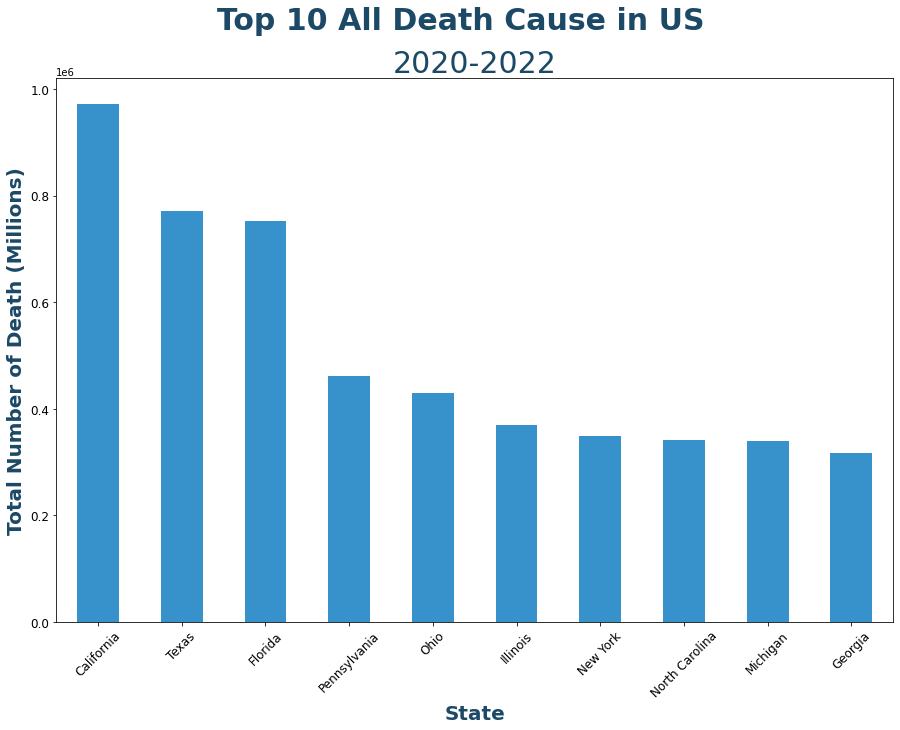

In [40]:
#Plot the top states that had the highest death count, across all years
death_by_state_df = clean_df.groupby(["State"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_state_df = death_by_state_df.round().astype(int)
# Highest death "All Cause" by state
top_10_state = death_by_state_df.sort_values('All Cause',ascending=False).head(10)
top_10_state = top_10_state['All Cause']
#top_10_state

# Plot bar chart 
plt.figure(figsize=(15,10))
top_10_state.plot(kind ="bar", color = "#3792cb", rot = 45, align="center", fontsize = 12)

plt.xlabel("State", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Death (Millions)", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.suptitle("Top 10 All Death Cause in US",fontsize=30, color = "#1c4966", fontweight="bold")
plt.title("2020-2022", fontsize = 30, color = "#1c4966")
plt.savefig("Images/bar_Top10AllDeathCauseinUS.png", bbox_inches="tight")
plt.show()

In [67]:
#Treemap showing the distribution by state of deaths across all years where size and color indicate greater share
#All Cause
statewise_cases = pd.DataFrame(clean_df.groupby(['State'])['All Cause'].sum().reset_index())
statewise_cases["Country"] = "US" # in order to have a single root node
fig = px.treemap(statewise_cases, path=['Country','State'], values='All Cause',
                  color='All Cause', 
                  #hover_data=['State'],
                  color_continuous_scale='matter',
                title = 'All Cause Death by State (2020 - 2022)')
fig.show()

In [65]:
# For the maps - create dfs by year
# # 2020 data
# state_2020_df = clean_df.loc[clean_df["Year"]== 2020]
# # 2021 data
# state_2021_df = clean_df.loc[clean_df["Year"]== 2021]
# # 2022 data
# state_2022_df = clean_df.loc[clean_df["Year"]== 2022]

In [43]:
clean_df['Month-Year'] = clean_df['Month-Year'].astype(str)
fig = px.choropleth(clean_df,
                    locations = 'State Code',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    range_color = (0,12000),
                    color = 'All Cause' ,
                    hover_name = 'State',
                    hover_data = ['All Cause', 'Month-Year'],
                    color_continuous_scale = 'amp',
                    animation_frame="Month-Year",
                    title = '2020-2022 Total Death Number Across the States'
                   )
fig.show()

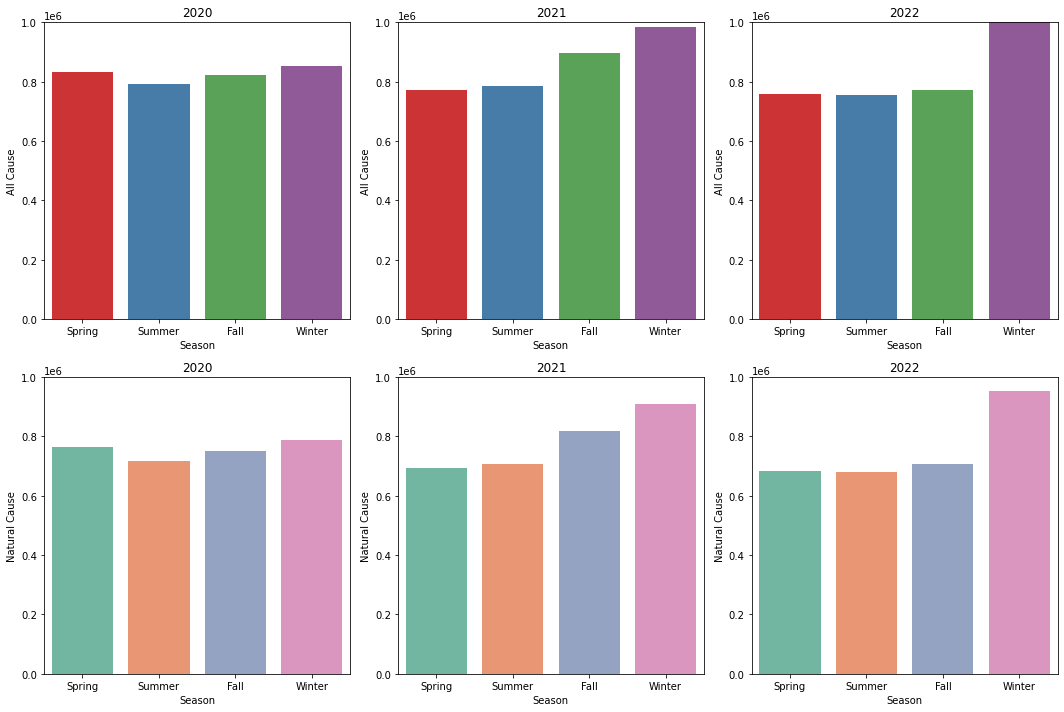

In [44]:
#Year by Year View into the Total Deaths for All Causes & Natural Deaths
#When reviewing the data, it appears that the fall and winter seasons see a larger number of deaths compared to other seasons
plt.figure(figsize = (15,10))

#All Causes
plt.subplot(2,3,1)

sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="All Cause", palette = 'Set1', errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim = (0,1000000))
plt.subplot(2,3,2)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="All Cause", palette = 'Set1',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim = (0,1000000))
plt.subplot(2,3,3)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="All Cause", palette = 'Set1',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim = (0,1000000))
#############
#Natural Causes
plt.subplot(2,3,4)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Natural Cause", palette = 'Set2',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim = (0,1000000))
plt.subplot(2,3,5)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Natural Cause", palette = 'Set2',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim = (0,1000000))
plt.subplot(2,3,6)
plt.tight_layout()
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Natural Cause", palette = 'Set2',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim = (0,1000000))
#############
plt.savefig("Images/subplot_AllCauses&Natural Deaths.png", bbox_inches="tight")



# 'Diabetes',
#        'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
#        'Kidney Disease', 'Unclassified',
#        'All Heart Diseases','COVID-19']

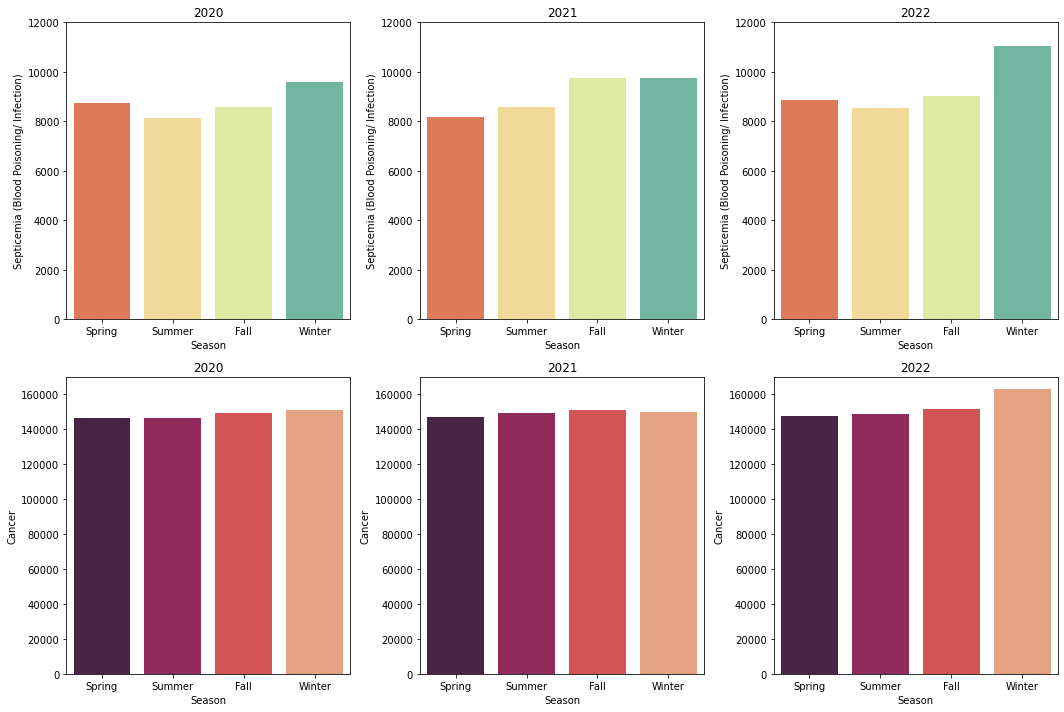

In [45]:
#Year by Year View into the Total Deaths for Cancer & Septicemia
plt.figure(figsize = (15,10))
#Septicemia
plt.subplot(2,3,1)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Septicemia (Blood Poisoning/ Infection)", palette = 'Spectral',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim=(0,12000))
plt.subplot(2,3,2)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Septicemia (Blood Poisoning/ Infection)", palette = 'Spectral',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim=(0,12000))
plt.subplot(2,3,3)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Septicemia (Blood Poisoning/ Infection)", palette = 'Spectral',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim=(0,12000))
#############
#Cancer
plt.subplot(2,3,4)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Cancer", palette = 'rocket',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim=(0,170000))
plt.subplot(2,3,5)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Cancer", palette = 'rocket',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim=(0,170000))
plt.subplot(2,3,6)
plt.tight_layout()
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Cancer", palette = 'rocket',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim=(0,170000))
plt.savefig("Images/subplot_Cancer&Septicemia.png", bbox_inches="tight")

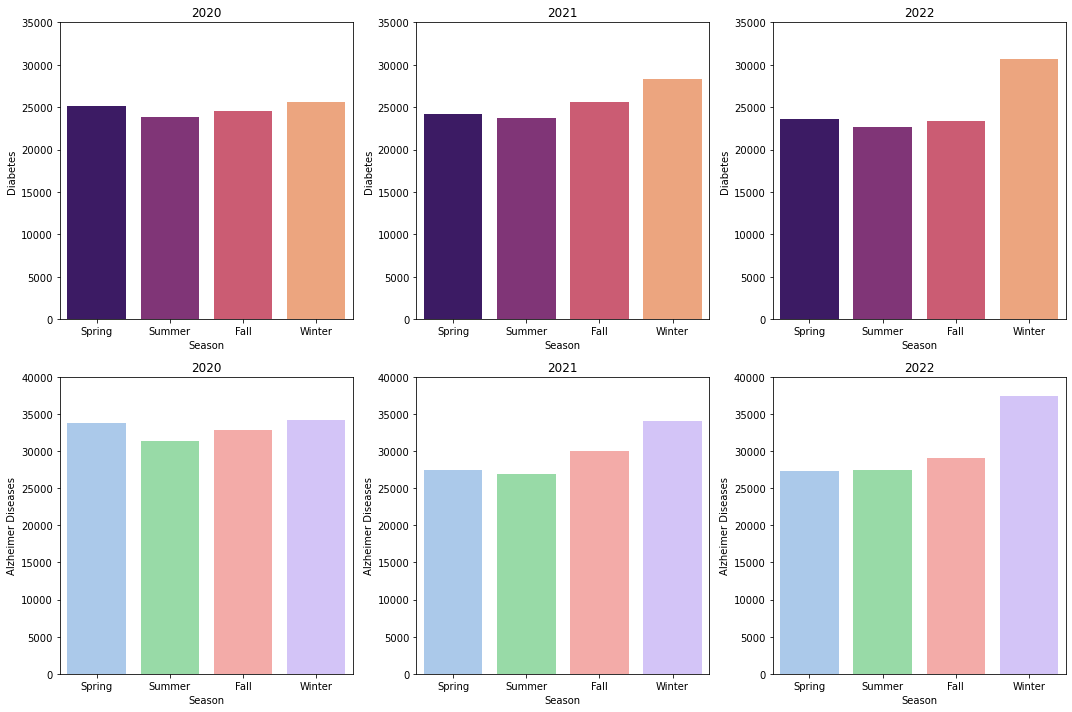

In [46]:
#Year by Year View into the Total Deaths for Diabetes & Alzheimers
plt.figure(figsize = (15,10))
#Diabetes
plt.subplot(2,3,1)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Diabetes", palette = 'magma',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim = (0,35000))
plt.subplot(2,3,2)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Diabetes", palette = 'magma',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim = (0,35000))
plt.subplot(2,3,3)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Diabetes", palette = 'magma',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim = (0,35000))
# #############
#Alzheimer Diseases
plt.subplot(2,3,4)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Alzheimer Diseases", palette = 'pastel6',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim = (0,40000))
plt.subplot(2,3,5)
plt.tight_layout()
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Alzheimer Diseases", palette = 'pastel6',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim = (0,40000))
plt.subplot(2,3,6)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Alzheimer Diseases", palette = 'pastel6',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim = (0,40000))
# #############
plt.savefig("Images/subplot_Diabetes&Alzheimers.png", bbox_inches="tight")

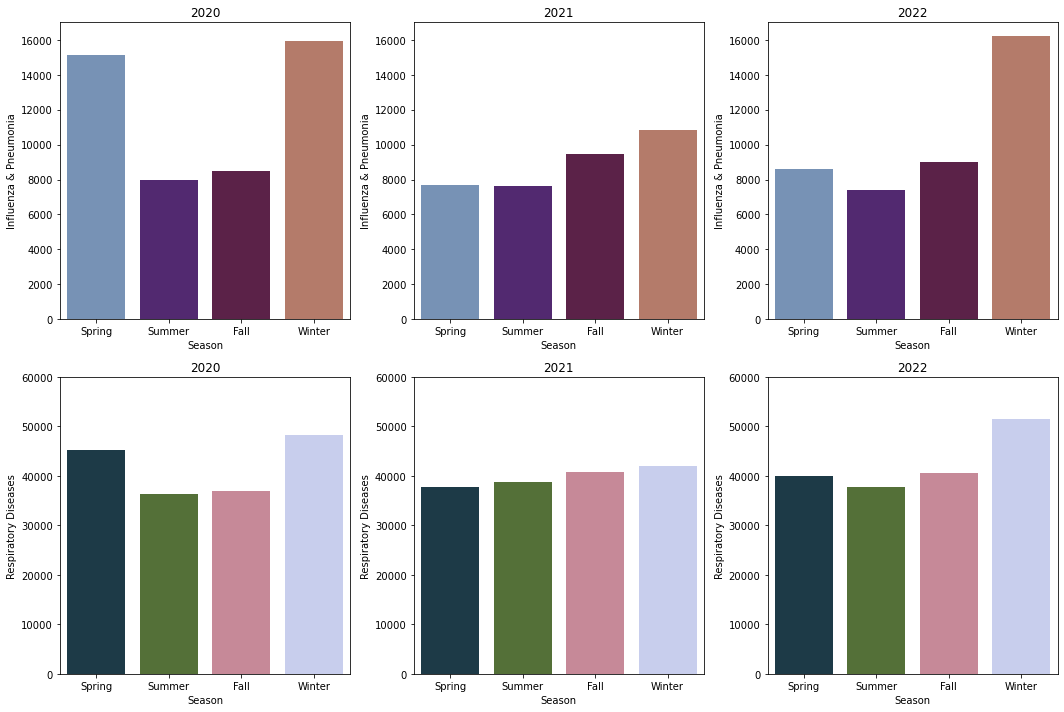

In [47]:
#Year by Year View into the Total Deaths for Influenzea & Respiratory Diseases
plt.figure(figsize = (15,10))
#Influenza & Pneumonia
plt.subplot(2,3,1)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Influenza & Pneumonia", palette = 'twilight',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim = (0,17000))
plt.subplot(2,3,2)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Influenza & Pneumonia", palette = 'twilight',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim = (0,17000))
plt.subplot(2,3,3)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Influenza & Pneumonia", palette = 'twilight',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim = (0,17000))
# #############
#Respiratory Diseases
plt.subplot(2,3,4)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Respiratory Diseases", palette = 'cubehelix',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020', ylim = (0,60000))
plt.subplot(2,3,5)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Respiratory Diseases", palette = 'cubehelix',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021', ylim = (0,60000))
plt.subplot(2,3,6)
plt.tight_layout()
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Respiratory Diseases", palette = 'cubehelix',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022', ylim = (0,60000))
# #############
plt.savefig("Images/subplot_Influenzea&Respiratory Diseases.png", bbox_inches="tight")

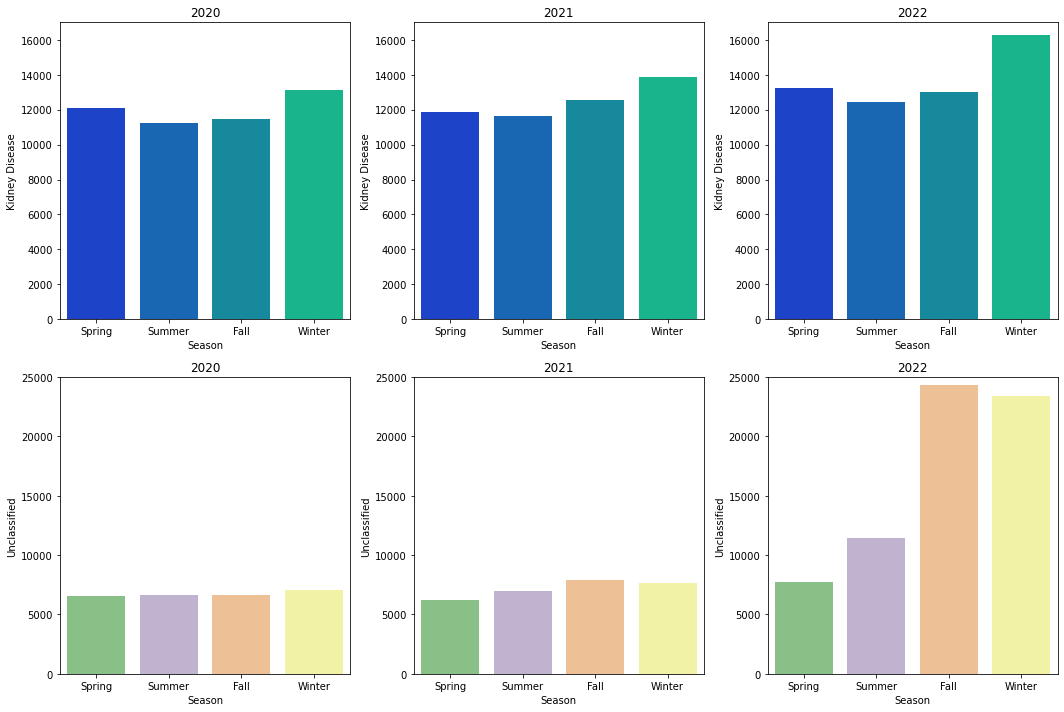

In [48]:
#Year by Year View into the Total Deaths for Kidney Disease & Unclassified
plt.figure(figsize = (15,10))
#Kidney Disease
plt.subplot(2,3,1)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Kidney Disease", palette = 'winter',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020',ylim = (0,17000))
plt.subplot(2,3,2)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Kidney Disease", palette = 'winter',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021',ylim = (0,17000))
plt.subplot(2,3,3)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Kidney Disease", palette = 'winter',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022',ylim = (0,17000))
# #############
#Unclassified
plt.subplot(2,3,4)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="Unclassified", palette = 'Accent',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020',ylim = (0,25000))
plt.subplot(2,3,5)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="Unclassified", palette = 'Accent',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021',ylim = (0,25000))
plt.subplot(2,3,6)
plt.tight_layout()
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="Unclassified", palette = 'Accent',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022',ylim = (0,25000))
# #############
plt.savefig("Images/subplot_KidneyDisease&Unclassified.png", bbox_inches="tight")

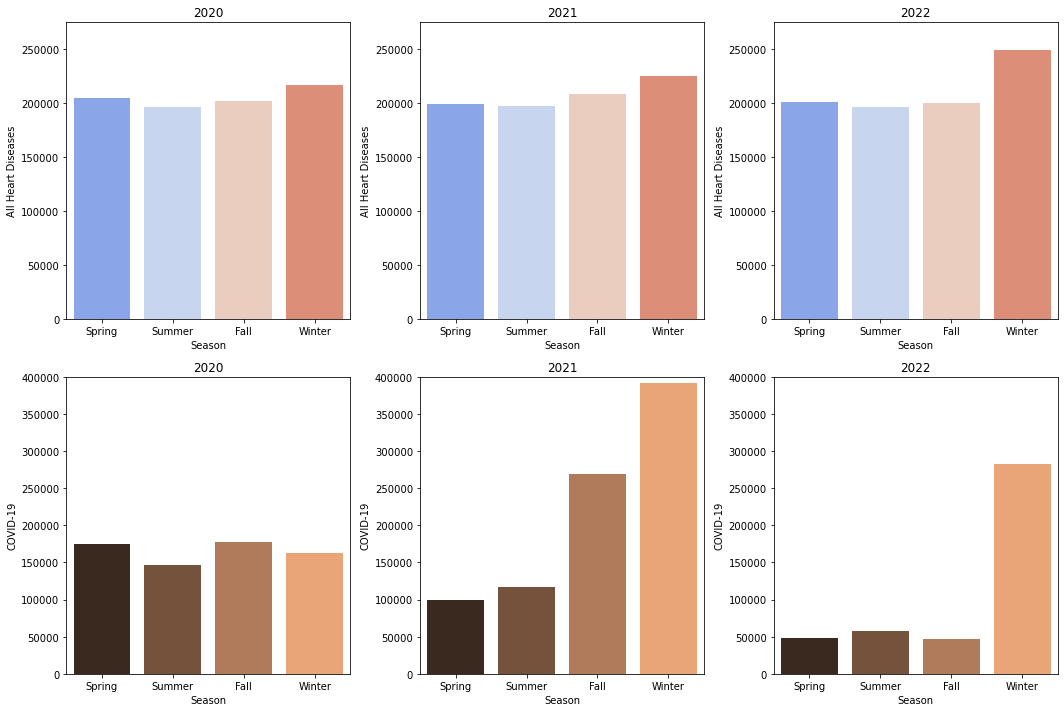

In [76]:
#Year by Year View into the Total Deaths for Heart Disease & COVID-19
plt.figure(figsize = (15,10))

#All Heart Diseases
plt.subplot(2,3,1)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="All Heart Diseases", palette = 'coolwarm',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020',ylim = (0,275000))
plt.subplot(2,3,2)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="All Heart Diseases", palette = 'coolwarm',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021',ylim = (0,275000))
plt.subplot(2,3,3)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="All Heart Diseases", palette = 'coolwarm',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022',ylim = (0,275000))
# #############
#COVID-19
plt.subplot(2,3,4)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2020], x="Season", y="COVID-19", palette = 'copper',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2020',ylim = (0,400000))
plt.subplot(2,3,5)
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2021], x="Season", y="COVID-19", palette = 'copper',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2021',ylim = (0,400000))
plt.subplot(2,3,6)
plt.tight_layout()
sns.barplot(data=deaths_by_year_season_df.loc[deaths_by_year_season_df['Year']==2022], x="Season", y="COVID-19", palette = 'copper',errorbar=None, order=['Spring','Summer','Fall','Winter']).set(title='2022',ylim = (0,400000))
# #############
plt.savefig("Images/subplot_HeartDisease&COVID-19.png", bbox_inches="tight")

In [50]:
#Year by Year View into the Total Deaths for Deaths by Year, State
death_by_year_state_df = clean_df.groupby(['Year','State']).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_year_state_df = death_by_year_state_df.round().astype(int).reset_index()
death_by_year_state_df


,Year,State,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020,Alabama,62550,58069,977,10222,1395,3016,1074,4227,1034,1113,17650,12279
1,2020,Alaska,4971,4195,0,964,0,0,0,0,0,0,33,284
2,2020,Arizona,75955,68149,185,12863,2542,3259,1124,4762,769,1058,17621,16685
3,2020,Arkansas,37432,34598,294,6389,1310,1770,608,1190,644,10,10151,7160
4,2020,California,315430,289342,1699,59712,11501,18617,6058,15764,4378,1220,84094,58434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022,Virginia,83583,77490,1090,15908,2884,2558,1019,4598,1716,2402,21199,11059
152,2022,Washington,70018,63120,677,13612,2224,3737,675,3832,502,1456,16682,7256
153,2022,West Virginia,27511,25048,10,4736,1065,721,336,0,523,953,6459,4220
154,2022,Wisconsin,61311,55707,550,11745,1484,2409,449,3233,892,1428,15878,7146


In [51]:
# Deaths by Month, State
death_by_month_state_df = clean_df.groupby(['Month','State']).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_month_state_df = death_by_month_state_df.round().astype(int).reset_index()
death_by_month_state_df

,Month,State,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,April,Alabama,14471,13234,290,2469,420,642,246,1023,281,254,4257,1150
1,April,Alaska,1177,997,0,226,0,0,0,0,0,0,12,0
2,April,Arizona,17236,15344,72,3350,569,713,228,1128,205,183,4245,1332
3,April,Arkansas,8320,7575,103,1548,304,390,105,195,215,0,2370,304
4,April,California,73125,66545,389,14703,2764,4123,1247,3684,1129,468,20546,6274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,September,Virginia,18623,17163,235,3584,562,610,197,970,369,456,4415,3470
620,September,Washington,15835,14236,105,3157,460,858,70,734,108,180,3552,2831
621,September,West Virginia,6364,5685,0,1063,231,166,22,53,140,142,1351,1557
622,September,Wisconsin,13434,12068,137,2661,383,540,81,446,186,144,3395,1665


In [52]:
# Deaths by Month-Year, State
death_by_month_year_state_df = clean_df.groupby(['Month-Year','State']).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_month_year_state_df = death_by_month_year_state_df.round().astype(int).reset_index()
death_by_month_year_state_df

,Month-Year,State,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020-01,Alabama,4304,4027,84,784,89,202,115,357,85,106,1329,0
1,2020-01,Alaska,390,329,0,80,0,0,0,0,0,0,0,0
2,2020-01,Arizona,5282,4762,10,1031,203,256,123,419,70,71,1413,0
3,2020-01,Arkansas,2632,2445,38,512,94,136,76,69,28,0,780,0
4,2020-01,California,23423,21618,149,4686,918,1492,760,1478,384,92,7050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,2022-12,Virginia,8096,7726,104,1561,291,293,177,490,153,453,2155,534
1868,2022-12,Washington,7381,6909,71,1325,216,383,225,497,43,405,1754,535
1869,2022-12,West Virginia,2728,2601,0,471,100,71,83,0,66,211,704,183
1870,2022-12,Wisconsin,6142,5814,60,1169,136,252,145,395,78,384,1593,464


In [53]:
#Set y lists
y1 = death_by_month_year_df['Septicemia (Blood Poisoning/ Infection)']
y2 = death_by_month_year_df['Cancer']
y3 = death_by_month_year_df['Diabetes']
y4 = death_by_month_year_df['Alzheimer Diseases']
y5 = death_by_month_year_df['Influenza & Pneumonia']
y6 = death_by_month_year_df['Respiratory Diseases']
y7 = death_by_month_year_df['Kidney Disease']
y8 = death_by_month_year_df['Unclassified']
y9 = death_by_month_year_df['All Heart Diseases']
y10 = death_by_month_year_df['COVID-19']

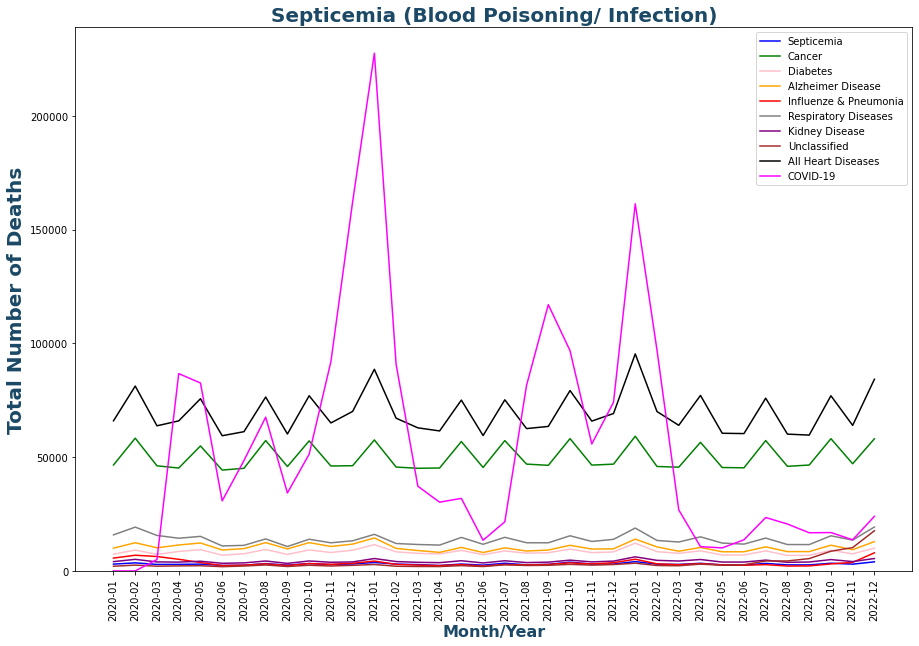

In [70]:
#Deaths by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x,y1, '-', color = 'blue', label = 'Septicemia')
plt.plot(x,y2, '-', color = 'green', label = 'Cancer')
plt.plot(x,y3, '-', color = 'pink', label = 'Diabetes')
plt.plot(x,y4, '-', color = 'orange', label = 'Alzheimer Disease')
plt.plot(x,y5, '-', color = 'red', label = 'Influenze & Pneumonia')
plt.plot(x,y6, '-', color = 'gray', label = 'Respiratory Diseases')
plt.plot(x,y7, '-', color = 'purple', label = 'Kidney Disease')
plt.plot(x,y8, '-', color = 'brown', label = 'Unclassified')
plt.plot(x,y9, '-', color = 'black', label = 'All Heart Diseases')
plt.plot(x,y10, '-', color = 'magenta', label = 'COVID-19')
plt.xlabel("Month/Year", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Deaths", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.legend()
plt.ylim(0)
plt.title('Septicemia (Blood Poisoning/ Infection)', fontsize = 20, color = "#1c4966", fontweight="bold")
plt.xticks(rotation=90)
plt.legend()
plt.savefig("Images/line_DeathsbyMonth-Year.png", bbox_inches="tight")
plt.show()

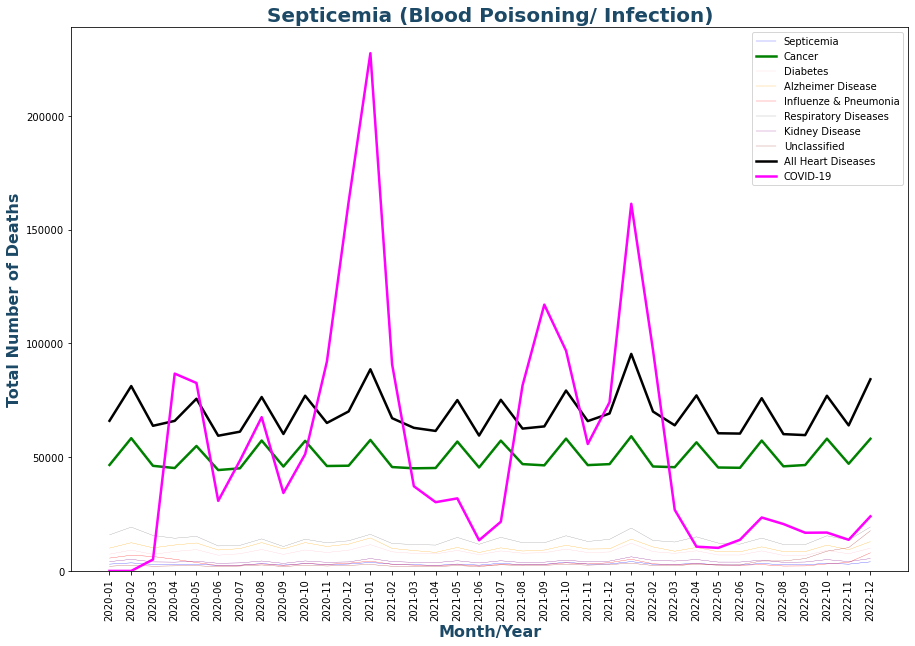

In [69]:
#Deaths by Month-Year, focused
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x,y1, '-', lw = 0.25, color = 'blue', label = 'Septicemia')
plt.plot(x,y2, '-', lw = 2.5, color = 'green', label = 'Cancer')
plt.plot(x,y3, '-', lw = 0.25, color = 'pink', label = 'Diabetes')
plt.plot(x,y4, '-', lw = 0.25, color = 'orange', label = 'Alzheimer Disease')
plt.plot(x,y5, '-', lw = 0.25, color = 'red', label = 'Influenze & Pneumonia')
plt.plot(x,y6, '-', lw = 0.25, color = 'gray', label = 'Respiratory Diseases')
plt.plot(x,y7, '-', lw = 0.25, color = 'purple', label = 'Kidney Disease')
plt.plot(x,y8, '-', lw = 0.25, color = 'brown', label = 'Unclassified')
plt.plot(x,y9, '-', lw = 2.5, color = 'black', label = 'All Heart Diseases')
plt.plot(x,y10, '-',lw = 2.5, color = 'magenta', label = 'COVID-19')
plt.xlabel("Month/Year", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Deaths", fontsize =16, color = "#1c4966", fontweight="bold")
plt.legend()
plt.ylim(0)
plt.title('Septicemia (Blood Poisoning/ Infection)', fontsize = 20, color = "#1c4966", fontweight="bold")
plt.xticks(rotation=90)
plt.legend()
plt.savefig("Images/line_DeathsbyMonth-Year_Focused.png", bbox_inches="tight")
plt.show()

In [56]:
#Merge Population Data to Death by Year
deaths_by_year = deaths_by_year_df.merge(population_by_year, how = 'left', on = 'Year')
deaths_by_year = deaths_by_year[['Year', 'Population', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 'All Heart Diseases', 'COVID-19']]
#deaths_by_year = death_by_year['Population'].round().astype(int).reset_index()
deaths_by_year = deaths_by_year.fillna({'Population':0}).astype(int)
deaths_by_year.set_index('Year').T

Year,2020,2021,2022
Population,334793069,335294247,336509346
All Cause,3304183,3439985,3302866
Natural Cause,3022107,3129157,3022345
Septicemia (Blood Poisoning/ Infection),35028,36282,37426
Cancer,593303,598029,611014
Diabetes,99246,101871,100244
Alzheimer Diseases,132321,118556,121413
Influenza & Pneumonia,47525,35568,41248
Respiratory Diseases,166781,159323,169817
Kidney Disease,47955,49974,54980


In [57]:
death_by_year_state_df['Year'] = death_by_year_state_df['Year'].astype(str)

In [58]:
#TODO - Break out into 2 tables, 1 for totals and another for rates

#death rate by year
death_rate_by_year = deaths_by_year
death_rate_by_year['All Causes Death Rate (%)']= deaths_by_year['All Cause'] / deaths_by_year['Population'] * 100
death_rate_by_year['Natural Cause Death Rate (%)']= deaths_by_year['Natural Cause'] / deaths_by_year['Population'] * 100
death_rate_by_year['Septicemia (Blood Poisoning/ Infection) Death Rate (%)']= deaths_by_year['Septicemia (Blood Poisoning/ Infection)'] / deaths_by_year['Population'] * 100
death_rate_by_year['Cancer Death Rate (%)']= deaths_by_year['Cancer'] / deaths_by_year['Population'] * 100
death_rate_by_year['Diabetes Death Rate (%)']= deaths_by_year['Diabetes'] / deaths_by_year['Population'] * 100
death_rate_by_year['Alzheimer Diseases Rate (%)']= deaths_by_year['Alzheimer Diseases'] / deaths_by_year['Population'] * 100
death_rate_by_year['Influenza & Pneumonia Death Rate (%)']= deaths_by_year['Influenza & Pneumonia'] / deaths_by_year['Population'] * 100
death_rate_by_year['Respiratory Diseases Death Rate (%)']= deaths_by_year['Respiratory Diseases'] / deaths_by_year['Population'] * 100
death_rate_by_year['Kidney Disease Death Rate (%)']= deaths_by_year['Kidney Disease'] / deaths_by_year['Population'] * 100
death_rate_by_year['Unclassified Death Rate (%)']= deaths_by_year['Unclassified'] / deaths_by_year['Population'] * 100
death_rate_by_year['All Heart Diseases Death Rate (%)']= deaths_by_year['All Heart Diseases'] / deaths_by_year['Population'] * 100
death_rate_by_year['COVID-19 Death Rate (%)']= deaths_by_year['COVID-19'] / deaths_by_year['Population'] * 100

death_rate_by_year = death_rate_by_year[['Year','All Causes Death Rate (%)', 'Natural Cause Death Rate (%)',
       'Septicemia (Blood Poisoning/ Infection) Death Rate (%)',
       'Cancer Death Rate (%)', 'Diabetes Death Rate (%)',
       'Alzheimer Diseases Rate (%)', 'Influenza & Pneumonia Death Rate (%)',
       'Respiratory Diseases Death Rate (%)', 'Kidney Disease Death Rate (%)',
       'Unclassified Death Rate (%)', 'All Heart Diseases Death Rate (%)',
       'COVID-19 Death Rate (%)']].set_index('Year')

death_rate_by_year.style.background_gradient(axis =None, cmap='YlOrRd')

,All Causes Death Rate (%),Natural Cause Death Rate (%),Septicemia (Blood Poisoning/ Infection) Death Rate (%),Cancer Death Rate (%),Diabetes Death Rate (%),Alzheimer Diseases Rate (%),Influenza & Pneumonia Death Rate (%),Respiratory Diseases Death Rate (%),Kidney Disease Death Rate (%),Unclassified Death Rate (%),All Heart Diseases Death Rate (%),COVID-19 Death Rate (%)
Year,,,,,,,,,,,,
2020,0.986933,0.902679,0.010463,0.177215,0.029644,0.039523,0.014195,0.049816,0.014324,0.008032,0.245492,0.197417
2021,1.025960,0.933257,0.010821,0.178359,0.030383,0.035359,0.010608,0.047517,0.014905,0.008594,0.247614,0.261836
2022,0.981508,0.898146,0.011122,0.181574,0.029789,0.036080,0.012258,0.050464,0.016338,0.019905,0.252077,0.129281


In [59]:
#Apply heat mapping to results, exclude All Causes and Natural Causes
death_rate_by_year2 = death_rate_by_year.iloc[0:3,2:12]
death_rate_by_year2
death_rate_by_year2.style.background_gradient(axis =None, cmap='YlOrRd')

,Septicemia (Blood Poisoning/ Infection) Death Rate (%),Cancer Death Rate (%),Diabetes Death Rate (%),Alzheimer Diseases Rate (%),Influenza & Pneumonia Death Rate (%),Respiratory Diseases Death Rate (%),Kidney Disease Death Rate (%),Unclassified Death Rate (%),All Heart Diseases Death Rate (%),COVID-19 Death Rate (%)
Year,,,,,,,,,,
2020,0.010463,0.177215,0.029644,0.039523,0.014195,0.049816,0.014324,0.008032,0.245492,0.197417
2021,0.010821,0.178359,0.030383,0.035359,0.010608,0.047517,0.014905,0.008594,0.247614,0.261836
2022,0.011122,0.181574,0.029789,0.036080,0.012258,0.050464,0.016338,0.019905,0.252077,0.129281


In [60]:
#Merge Population Data to Death by Year, State
death_by_year_state = death_by_year_state_df.merge(population_by_year_state, how = 'left', on = ['Year','State'])
death_by_year_state = death_by_year_state[['Year','State', 'Population', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 'All Heart Diseases', 'COVID-19']]
death_by_year_state.set_index('Year')

,State,Population,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
Year,,,,,,,,,,,,,,
2020,Alabama,5031362,62550,58069,977,10222,1395,3016,1074,4227,1034,1113,17650,12279
2020,Alaska,732923,4971,4195,0,964,0,0,0,0,0,0,33,284
2020,Arizona,7179943,75955,68149,185,12863,2542,3259,1124,4762,769,1058,17621,16685
2020,Arkansas,3014195,37432,34598,294,6389,1310,1770,608,1190,644,10,10151,7160
2020,California,39501653,315430,289342,1699,59712,11501,18617,6058,15764,4378,1220,84094,58434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,Virginia,8683619,83583,77490,1090,15908,2884,2558,1019,4598,1716,2402,21199,11059
2022,Washington,7785786,70018,63120,677,13612,2224,3737,675,3832,502,1456,16682,7256
2022,West Virginia,1775156,27511,25048,10,4736,1065,721,336,0,523,953,6459,4220


# Everything below this line needs additional work and refinement

In [61]:
#TODO - Investifate NaNs
#death rate by year, state
death_rate_by_year_state = death_by_year_state
death_rate_by_year_state['All Causes Death Rate (%)']= death_by_year_state['All Cause'] / death_by_year_state['Population'] * 100
death_rate_by_year_state['Natural Cause Death Rate (%)']= death_rate_by_year_state['Natural Cause'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['Septicemia (Blood Poisoning/ Infection) Death Rate (%)']= death_rate_by_year_state['Septicemia (Blood Poisoning/ Infection)'] / deaths_by_year['Population'] * 100
death_rate_by_year_state['Cancer Death Rate (%)']= deaths_by_year['Cancer'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['Diabetes Death Rate (%)']= deaths_by_year['Diabetes'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['Alzheimer Diseases Rate (%)']= deaths_by_year['Alzheimer Diseases'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['Influenza & Pneumonia Death Rate (%)']= deaths_by_year['Influenza & Pneumonia'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['Respiratory Diseases Death Rate (%)']= deaths_by_year['Respiratory Diseases'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['Kidney Disease Death Rate (%)']= deaths_by_year['Kidney Disease'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['Unclassified Death Rate (%)']= deaths_by_year['Unclassified'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['All Heart Diseases Death Rate (%)']= deaths_by_year['All Heart Diseases'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state['COVID-19 Death Rate (%)']= deaths_by_year['COVID-19'] / death_rate_by_year_state['Population'] * 100
death_rate_by_year_state_only = death_rate_by_year_state[['Year','State', 'All Causes Death Rate (%)', 'Natural Cause Death Rate (%)',
       'Septicemia (Blood Poisoning/ Infection) Death Rate (%)',
       'Cancer Death Rate (%)', 'Diabetes Death Rate (%)',
       'Alzheimer Diseases Rate (%)', 'Influenza & Pneumonia Death Rate (%)',
       'Respiratory Diseases Death Rate (%)', 'Kidney Disease Death Rate (%)',
       'Unclassified Death Rate (%)', 'All Heart Diseases Death Rate (%)',
       'COVID-19 Death Rate (%)']].set_index('Year')
death_rate_by_year_state_only
death_rate_by_year_state
# death_rate_by_year_state.style.background_gradient(axis =None, cmap='YlOrRd')

,Year,State,Population,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,...,Septicemia (Blood Poisoning/ Infection) Death Rate (%),Cancer Death Rate (%),Diabetes Death Rate (%),Alzheimer Diseases Rate (%),Influenza & Pneumonia Death Rate (%),Respiratory Diseases Death Rate (%),Kidney Disease Death Rate (%),Unclassified Death Rate (%),All Heart Diseases Death Rate (%),COVID-19 Death Rate (%)
0,2020,Alabama,5031362,62550,58069,977,10222,1395,3016,1074,...,0.000292,11.792095,1.972547,2.629924,0.944575,3.314828,0.953122,0.534428,16.335318,13.136403
1,2020,Alaska,732923,4971,4195,0,964,0,0,0,...,0.000000,81.595065,13.899277,16.175778,4.852897,21.738027,6.818452,3.931518,113.277111,119.783388
2,2020,Arizona,7179943,75955,68149,185,12863,2542,3259,1124,...,0.000055,8.510012,1.396167,1.691002,0.574489,2.365158,0.765744,0.932890,11.814314,6.059143
3,2020,Arkansas,3014195,37432,34598,294,6389,1310,1770,608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,California,39501653,315430,289342,1699,59712,11501,18617,6058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022,Virginia,8683619,83583,77490,1090,15908,2884,2558,1019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,2022,Washington,7785786,70018,63120,677,13612,2224,3737,675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,2022,West Virginia,1775156,27511,25048,10,4736,1065,721,336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,2022,Wisconsin,5892539,61311,55707,550,11745,1484,2409,449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#TODO - Work through correlational analyses
death_rates = death_rate_by_year[['Year','All Causes Death Rate (%)',
                    'Natural Cause Death Rate (%)',
                    'Septicemia (Blood Poisoning/ Infection) Death Rate (%)',
                    'Cancer Death Rate (%)',
                    'Diabetes Death Rate (%)',
                    'Alzheimer Diseases Rate (%)',
                    'Influenza & Pneumonia Death Rate (%)',
                    'Respiratory Diseases Death Rate (%)',
                    'Kidney Disease Death Rate (%)',
                    'Unclassified Death Rate (%)',
                    'All Heart Diseases Death Rate (%)',
                    'COVID-19 Death Rate (%)']]

death_rates_data = death_rates.loc[death_rates['Year'].isin([2020,2021,2022])]

death_rates_data.set_index('Year')

col1 = death_rates_data['Septicemia (Blood Poisoning/ Infection) Death Rate (%)']
col2 = death_rates_data['Cancer Death Rate (%)']
corr = col1.corr(col2)
plt.scatter(col1,col2)
#corr
#ax = sns.heatmap(death_rates, linewidth = 0.5) 
plt.show()

KeyError: "['Year'] not in index"

In [ ]:
#TODO - Work through correlational analyses
#Plot Death Rate
death_rate_by_year_all_cause = death_rate_by_year[['Year','All Causes Death Rate (%)']]
death_rate_by_year_all_cause['Year'] = death_rate_by_year_all_cause['Year'].astype(str)
death_rate_by_year_all_cause.iloc[0:3].plot('Year','All Causes Death Rate (%)')
# death_rate_by_year_all_cause.plot('Year','All Causes Death Rate (%)')
plt.show()